In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar e preparar dados - Classificação

In [2]:
# Carregar o dataset
df = pd.read_csv('./datasets/fruit_quality.csv')

In [3]:
# Visualizar estrutura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
# Visualizar DF
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [5]:
# Ajustar Dataframe

# Remover a coluna 'A_id'
df.drop('A_id', axis=1, inplace=True)

# Transformar coluna 'Quality' em numérica
df['Quality'] = (df['Quality'] == 'good').astype(int)
df.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### Treinar o modelo de Regressão Logística

In [6]:
# Separar X e y
X = df.drop('Quality', axis=1)
y=df['Quality']

In [7]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [8]:
# Treinar modelo
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### Apresentar Plots Shapley Values - Classificação

In [9]:
# Rodar o explainer no conjunto de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [10]:
# Calcular Shapley Values no conjunto de testes
shap_values_class = explainer_class(X_test)

ExactExplainer explainer: 1201it [00:24, 34.99it/s]                          


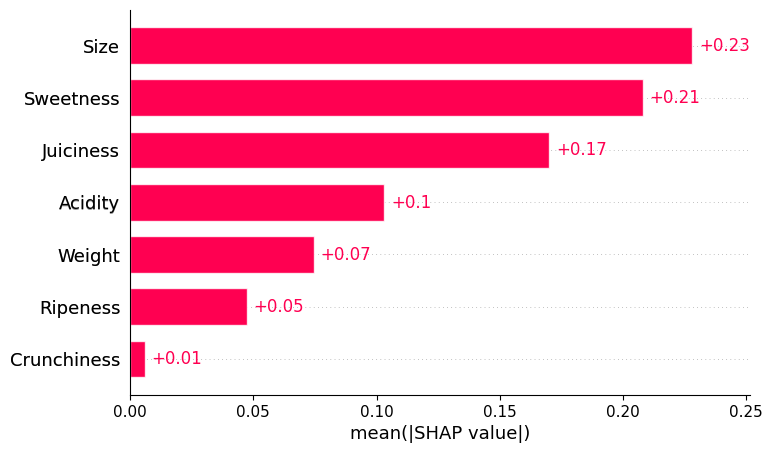

In [11]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_class)

In [12]:
# Mostrar 1° instância do conjunto de testes
X_test.iloc[0, :]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

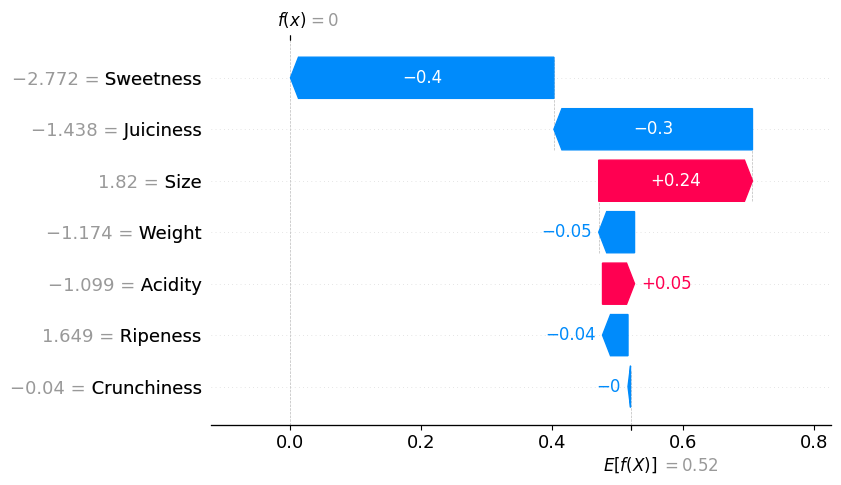

In [13]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_class[0], max_display=13)

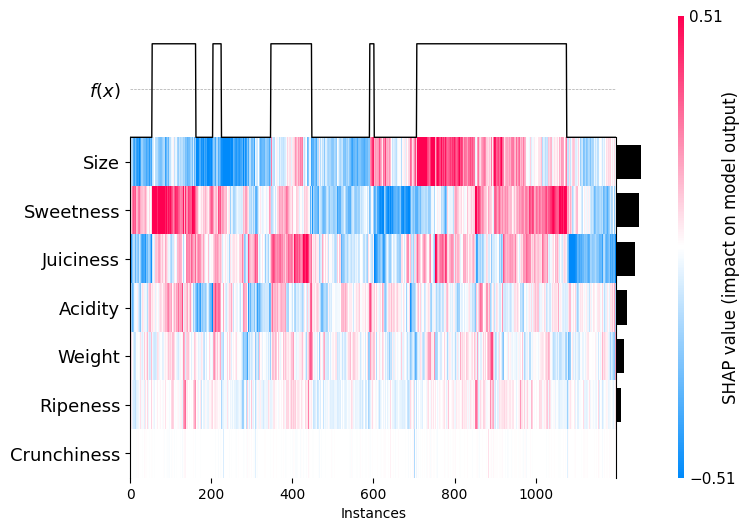

<Axes: xlabel='Instances'>

In [14]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_class, max_display=13)

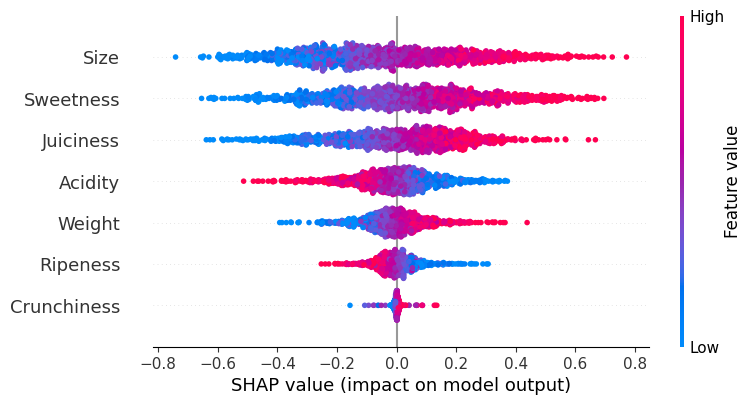

In [15]:
# Plot de Beeswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)